In [ ]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
!pip install --upgrade numpy
!pip install --upgrade scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 29.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
accelerate 0.32.1 requires numpy<2.0.0,>=1.17, but you have numpy 2.0.1 which is incompatible.
astropy 5.3.4 requires numpy<2,>=1.21, but you have numpy 2.0.1 which is incompatible.
cudf-cu12 24.4.1 requires numpy<2.0a0,>=1.23, but you have numpy 2.0.1 which is incompatible.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
cupy-cuda12x 12.2.0 requires numpy<1.27,>=1.20, but you have numpy 2.0.1 which is incompatible.
ibis-framework 8.0.0 requires numpy<2,>=1, but you have numpy 2.0.1 which is incompatible.
ibis-framework 8.0.0 requi

In [ ]:
import seaborn as sns

In [ ]:
!pip uninstall scipy -y

Found existing installation: scipy 1.14.0
Uninstalling scipy-1.14.0:
  Successfully uninstalled scipy-1.14.0


In [ ]:
!pip install scipy==1.9.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 35.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 28.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.1
    Uninstalling numpy-2.0.1:
      Successfully uninstalled numpy-2.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
import scipy
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import torch
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification, BertTokenizer, BertForSequenceClassification
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/all-data.csv',
                 encoding='unicode_escape',
                 names=['Sentiment', 'Text'])
print(df.shape)
print('\n'*3)
df.head()

(4846, 2)






,Sentiment,Text
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
df.dropna(subset=['Text'], inplace=True)

In [ ]:
df.drop_duplicates(subset=['Text'],keep='first',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4838 entries, 0 to 4845
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Sentiment     4838 non-null   object
 1   Text          4838 non-null   object
 2   Cleaned_Text  4838 non-null   object
dtypes: object(3)
memory usage: 151.2+ KB


In [ ]:
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-z\s]', '', text)  # Remove punctuation and numbers
    return text

df['Cleaned_Text'] = df['Text'].apply(clean_text)

In [ ]:
df['Tokenized_Text'] = df['Cleaned_Text'].apply(word_tokenize)

In [ ]:
stop_words = set(stopwords.words('english'))
df['Tokenized_Text'] = df['Tokenized_Text'].apply(lambda x: [word for word in x if word not in stop_words])

In [ ]:
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()

df['Stemmed_Text'] = df['Tokenized_Text'].apply(lambda x: [ps.stem(word) for word in x])
df['Lemmatized_Text'] = df['Tokenized_Text'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

print(df.head())

  Sentiment                                               Text  \
0   neutral  According to Gran , the company has no plans t...   
1   neutral  Technopolis plans to develop in stages an area...   
2  negative  The international electronic industry company ...   
3  positive  With the new production plant the company woul...   
4  positive  According to the company 's updated strategy f...   

                                        Cleaned_Text  \
0  according to gran  the company has no plans to...   
1  technopolis plans to develop in stages an area...   
2  the international electronic industry company ...   
3  with the new production plant the company woul...   
4  according to the company s updated strategy fo...   

                                      Tokenized_Text  \
0  [according, gran, company, plans, move, produc...   
1  [technopolis, plans, develop, stages, area, le...   
2  [international, electronic, industry, company,...   
3  [new, production, plant, company, would

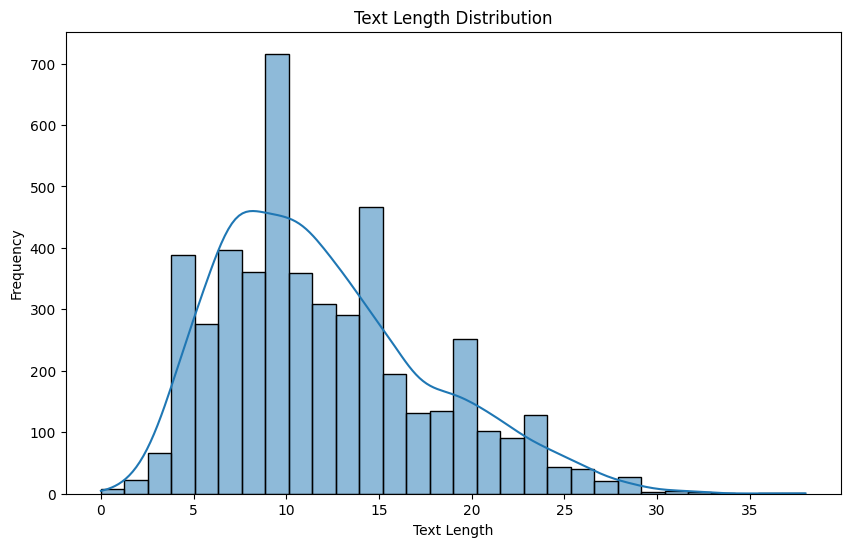

In [ ]:
df['Text_Length'] = df['Tokenized_Text'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df['Text_Length'], bins=30, kde=True)
plt.title('Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

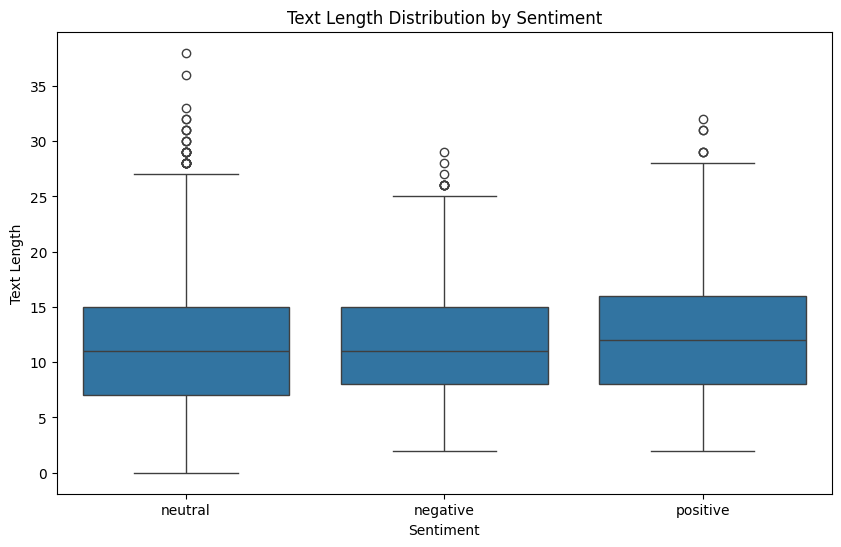

In [ ]:
# Text Length Distribution by Sentiment
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sentiment', y='Text_Length', data=df)
plt.title('Text Length Distribution by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Text Length')
plt.show()

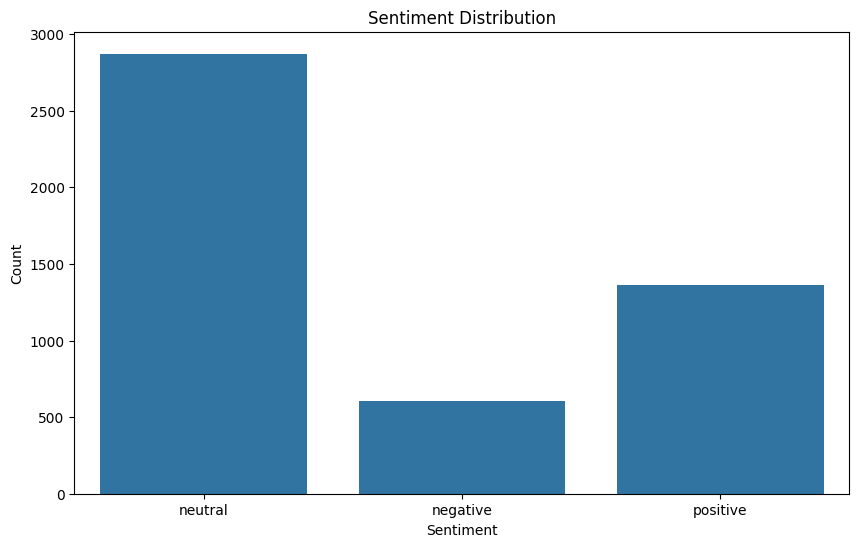

In [ ]:
# 2. Sentiment Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Sentiment', data=df)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='Sentiment'>

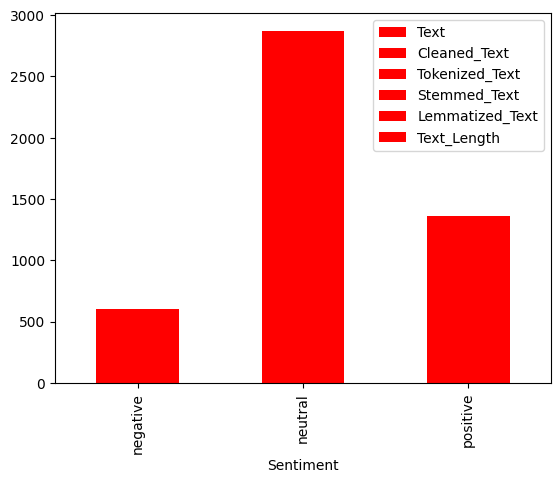

In [ ]:
df.groupby('Sentiment').count().plot(kind='bar',color = 'red')

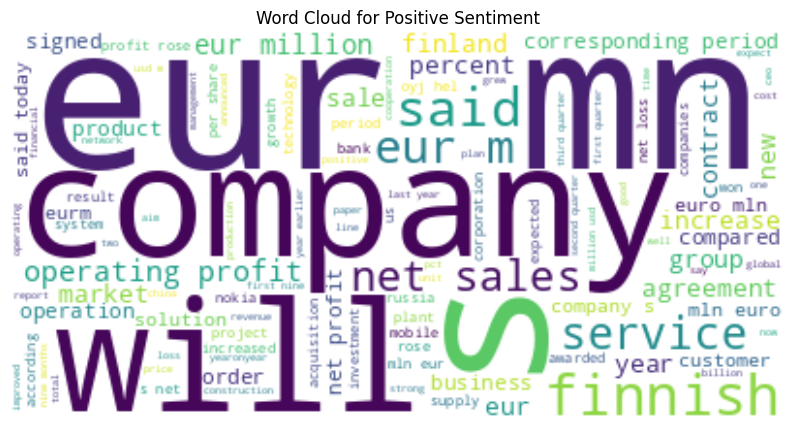

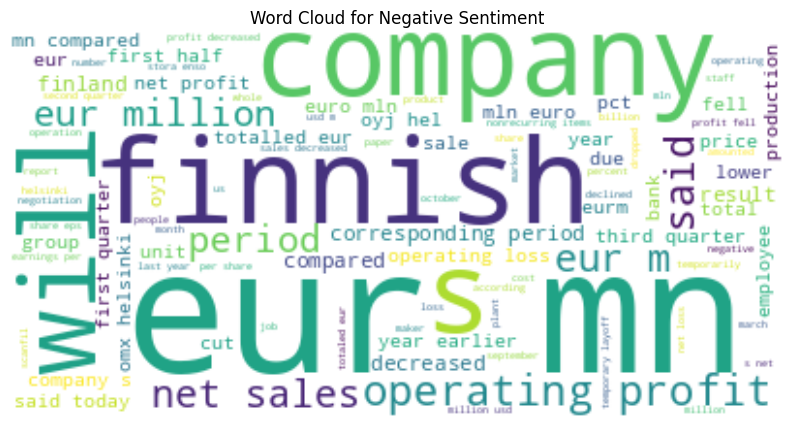

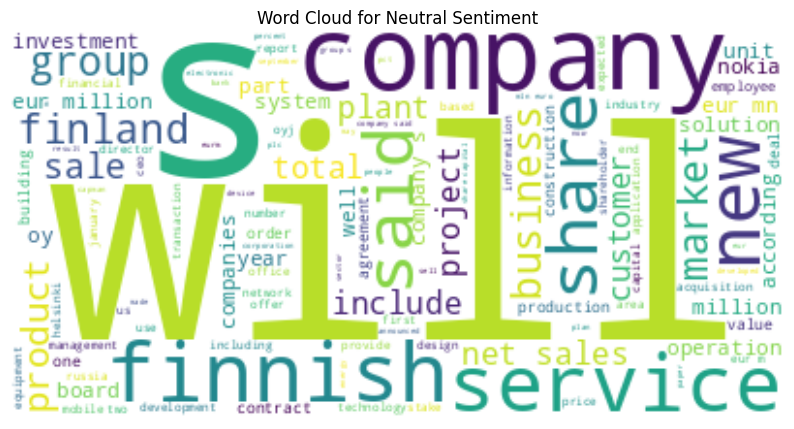

  Sentiment                                               Text  \
0   neutral  According to Gran , the company has no plans t...   
1   neutral  Technopolis plans to develop in stages an area...   
2  negative  The international electronic industry company ...   
3  positive  With the new production plant the company woul...   
4  positive  According to the company 's updated strategy f...   

                                        Cleaned_Text  \
0  according to gran  the company has no plans to...   
1  technopolis plans to develop in stages an area...   
2  the international electronic industry company ...   
3  with the new production plant the company woul...   
4  according to the company s updated strategy fo...   

                                      Tokenized_Text  \
0  [according, gran, company, plans, move, produc...   
1  [technopolis, plans, develop, stages, area, le...   
2  [international, electronic, industry, company,...   
3  [new, production, plant, company, would

In [ ]:
def generate_wordcloud(data, sentiment):
    text = " ".join(review for review in data[data['Sentiment'] == sentiment]['Cleaned_Text'])
    wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment.capitalize()} Sentiment')
    plt.axis('off')
    plt.show()

generate_wordcloud(df, 'positive')
generate_wordcloud(df, 'negative')
generate_wordcloud(df, 'neutral')

# Display the dataframe with all added columns
print(df.head())

In [ ]:
example = df['Text'][10]
print(example)

TeliaSonera TLSN said the offer is in line with its strategy to increase its ownership in core business holdings and would strengthen Eesti Telekom 's offering to its customers .


In [ ]:
tokens = nltk.word_tokenize(text = example, language='english')
print(tokens)

['TeliaSonera', 'TLSN', 'said', 'the', 'offer', 'is', 'in', 'line', 'with', 'its', 'strategy', 'to', 'increase', 'its', 'ownership', 'in', 'core', 'business', 'holdings', 'and', 'would', 'strengthen', 'Eesti', 'Telekom', "'s", 'offering', 'to', 'its', 'customers', '.']


In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 19.7 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 

In [ ]:
!pip install --upgrade pyarrow datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 33.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 42.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.8 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 

In [ ]:
from sklearn.model_selection import train_test_split
from datasets import Dataset, DatasetDict
label_map = {'positive': 0, 'neutral': 1, 'negative': 2}
df['label'] = df['Sentiment'].map(label_map)

# Split the datasdet into training and validation sets
train_df, val_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)

# Convert to Hugging Face Dataset
train_dataset = Dataset.from_pandas(train_df[['Cleaned_Text', 'label']])
val_dataset = Dataset.from_pandas(val_df[['Cleaned_Text', 'label']])

# Combine into a DatasetDict
dataset = DatasetDict({'train': train_dataset, 'validation': val_dataset})

# Vadar Model

In [ ]:
import nltk
nltk.download('vader_lexicon') # Download the vader lexicon

from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer() # Now you can initialize the analyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
sia.polarity_scores('I love cookie')

{'neg': 0.0, 'neu': 0.192, 'pos': 0.808, 'compound': 0.6369}

In [ ]:
predicted_sentiments = []
for text in df['Text']:
    score = sia.polarity_scores(text)
    if score['compound'] >= 0.05:
        predicted_sentiments.append('positive')
    elif score['compound'] <= -0.05:
        predicted_sentiments.append('negative')
    else:
        predicted_sentiments.append('neutral')

df['predicted_sia'] = predicted_sentiments

In [ ]:
df

,Sentiment,Text,Cleaned_Text,Tokenized_Text,Stemmed_Text,Lemmatized_Text,label,predicted_sia
0,neutral,"According to Gran , the company has no plans t...",according to gran the company has no plans to...,"[according, gran, company, plans, move, produc...","[accord, gran, compani, plan, move, product, r...","[according, gran, company, plan, move, product...",1,negative
1,neutral,Technopolis plans to develop in stages an area...,technopolis plans to develop in stages an area...,"[technopolis, plans, develop, stages, area, le...","[technopoli, plan, develop, stage, area, less,...","[technopolis, plan, develop, stage, area, le, ...",1,negative
2,negative,The international electronic industry company ...,the international electronic industry company ...,"[international, electronic, industry, company,...","[intern, electron, industri, compani, elcoteq,...","[international, electronic, industry, company,...",2,neutral
3,positive,With the new production plant the company woul...,with the new production plant the company woul...,"[new, production, plant, company, would, incre...","[new, product, plant, compani, would, increas,...","[new, production, plant, company, would, incre...",0,positive
4,positive,According to the company 's updated strategy f...,according to the company s updated strategy fo...,"[according, company, updated, strategy, years,...","[accord, compani, updat, strategi, year, baswa...","[according, company, updated, strategy, year, ...",0,positive
...,...,...,...,...,...,...,...,...
4841,negative,LONDON MarketWatch -- Share prices ended lower...,london marketwatch share prices ended lower i...,"[london, marketwatch, share, prices, ended, lo...","[london, marketwatch, share, price, end, lower...","[london, marketwatch, share, price, ended, low...",2,negative
4842,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...,rinkuskiai s beer sales fell by per cent to ...,"[rinkuskiai, beer, sales, fell, per, cent, mil...","[rinkuskiai, beer, sale, fell, per, cent, mill...","[rinkuskiai, beer, sale, fell, per, cent, mill...",1,neutral
4843,negative,Operating profit fell to EUR 35.4 mn from EUR ...,operating profit fell to eur mn from eur mn ...,"[operating, profit, fell, eur, mn, eur, mn, in...","[oper, profit, fell, eur, mn, eur, mn, includ,...","[operating, profit, fell, eur, mn, eur, mn, in...",2,positive
4844,negative,Net sales of the Paper segment decreased to EU...,net sales of the paper segment decreased to eu...,"[net, sales, paper, segment, decreased, eur, m...","[net, sale, paper, segment, decreas, eur, mn, ...","[net, sale, paper, segment, decreased, eur, mn...",2,positive


# Pre-trained Models


In [ ]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.2 MB/s eta 0:00:00


In [ ]:
import optuna
from transformers import TrainingArguments, Trainer, AutoTokenizer, AutoModelForSequenceClassification

# Clear GPU cache
import torch
torch.cuda.empty_cache()

# Define a function to optimize for FinBERT
def objective(trial):
    model_name = "ProsusAI/finbert"

    # Define hyperparameter search space
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 5e-5, log=True)
    batch_size = trial.suggest_categorical("batch_size", [8, 16])
    num_train_epochs = trial.suggest_int("num_train_epochs", 2, 3)
    weight_decay = trial.suggest_float("weight_decay", 0.01, 0.1)

    # Load tokenizer and model
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=3)

    def tokenize_function(examples):
        return tokenizer(examples['Cleaned_Text'], padding='max_length', truncation=True)

    tokenized_datasets = dataset.map(tokenize_function, batched=True, remove_columns=["Cleaned_Text"])

    # Define training arguments
    training_args = TrainingArguments(
        output_dir="./results",
        evaluation_strategy="epoch",
        learning_rate=learning_rate,
        per_device_train_batch_size=batch_size,
        per_device_eval_batch_size=batch_size,
        num_train_epochs=num_train_epochs,
        weight_decay=weight_decay,
        logging_dir="./logs",
        logging_steps=10,
    )

    # Define Trainer
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=tokenized_datasets["train"],
        eval_dataset=tokenized_datasets["validation"],
        tokenizer=tokenizer,
    )

    # Train the model
    trainer.train()

    # Evaluate the model
    eval_result = trainer.evaluate(eval_dataset=tokenized_datasets["validation"])

    # Clear GPU cache after each trial
    torch.cuda.empty_cache()

    return eval_result["eval_loss"]

# Create a study and optimize for FinBERT
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=2)

# Get the best hyperparameters for FinBERT
best_trial = study.best_trial
print(f"Best trial: {best_trial.values}")
print(f"Best hyperparameters: {best_trial.params}")

# Load the best hyperparameters
best_hparams = best_trial.params

# Load tokenizer and model with best hyperparameters for FinBERT
model_name = "ProsusAI/finbert"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=3)

# Tokenize the dataset for FinBERT
def tokenize_function(examples):
    return tokenizer(examples['Cleaned_Text'], padding='max_length', truncation=True)

tokenized_datasets = dataset.map(tokenize_function, batched=True)

# Define training arguments with best hyperparameters for FinBERT
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=best_hparams["learning_rate"],
    per_device_train_batch_size=best_hparams["batch_size"],
    per_device_eval_batch_size=best_hparams["batch_size"],
    num_train_epochs=best_hparams["num_train_epochs"],
    weight_decay=best_hparams["weight_decay"],
    logging_dir="./logs",
    logging_steps=10,
)

# Define Trainer for FinBERT
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    tokenizer=tokenizer,
)

# Train the FinBERT model
trainer.train()

# Define a function to optimize for RoBERTa
def objective_roberta(trial):
    model_name = "cardiffnlp/twitter-roberta-base-sentiment"

    # Define hyperparameter search space
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 5e-5, log=True)
    batch_size = trial.suggest_categorical("batch_size", [8, 16])
    num_train_epochs = trial.suggest_int("num_train_epochs", 2, 3)
    weight_decay = trial.suggest_float("weight_decay", 0.01, 0.1)

    # Load tokenizer and model
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=3)

    def tokenize_function(examples):
        return tokenizer(examples['Cleaned_Text'], padding='max_length', truncation=True)

    tokenized_datasets = dataset.map(tokenize_function, batched=True, remove_columns=["Cleaned_Text"])

    # Define training arguments
    training_args = TrainingArguments(
        output_dir="./results",
        evaluation_strategy="epoch",
        learning_rate=learning_rate,
        per_device_train_batch_size=batch_size,
        per_device_eval_batch_size=batch_size,
        num_train_epochs=num_train_epochs,
        weight_decay=weight_decay,
        logging_dir="./logs",
        logging_steps=10,
    )

    # Define Trainer
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=tokenized_datasets["train"],
        eval_dataset=tokenized_datasets["validation"],
        tokenizer=tokenizer,
    )

    # Train the model
    trainer.train()

    # Evaluate the model
    eval_result = trainer.evaluate(eval_dataset=tokenized_datasets["validation"])

    # Clear GPU cache after each trial
    torch.cuda.empty_cache()

    return eval_result["eval_loss"]

# Create a study and optimize for RoBERTa
study_roberta = optuna.create_study(direction="minimize")
study_roberta.optimize(objective_roberta, n_trials=2)

# Get the best hyperparameters for RoBERTa
best_trial_roberta = study_roberta.best_trial
print(f"Best trial: {best_trial_roberta.values}")
print(f"Best hyperparameters: {best_trial_roberta.params}")

# Load the best hyperparameters
best_hparams_roberta = best_trial_roberta.params

# Load tokenizer and model with best hyperparameters for RoBERTa
model_name = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=3)

# Tokenize the dataset for RoBERTa
def tokenize_function(examples):
    return tokenizer(examples['Cleaned_Text'], padding='max_length', truncation=True)

tokenized_datasets = dataset.map(tokenize_function, batched=True, remove_columns=["Cleaned_Text"])

# Define training arguments with best hyperparameters for RoBERTa
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=best_hparams_roberta["learning_rate"],
    per_device_train_batch_size=best_hparams_roberta["batch_size"],
    per_device_eval_batch_size=best_hparams_roberta["batch_size"],
    num_train_epochs=best_hparams_roberta["num_train_epochs"],
    weight_decay=best_hparams_roberta["weight_decay"],
    logging_dir="./logs",
    logging_steps=10,
)

# Define Trainer for RoBERTa
trainer_roberta = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    tokenizer=tokenizer,
)

# Train the RoBERTa model
trainer_roberta.train()

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_recall_fscore_support

# Function to evaluate model and generate confusion matrix
def evaluate_and_plot_confusion_matrix(trainer, dataset, model_name):
    raw_pred, _, _ = trainer.predict(dataset)
    y_pred = np.argmax(raw_pred, axis=1)
    y_true = dataset['label']

    # Print classification report
    report = classification_report(y_true, y_pred, target_names=label_map.keys())
    print(f"Classification Report for {model_name}:\n", report)

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_map.keys(), yticklabels=label_map.keys())
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    # Return evaluation metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')
    return accuracy, precision, recall, f1

# Evaluate and plot confusion matrix for FinBERT
post_tuning_accuracy, post_tuning_precision, post_tuning_recall, post_tuning_f1 = evaluate_and_plot_confusion_matrix(trainer, tokenized_datasets["validation"], "ProsusAI/finbert")
print(f"Post-tuning Accuracy for FinBERT: {post_tuning_accuracy}")
print(f"Post-tuning Precision for FinBERT: {post_tuning_precision}")
print(f"Post-tuning Recall for FinBERT: {post_tuning_recall}")
print(f"Post-tuning F1-Score for FinBERT: {post_tuning_f1}")

# Evaluate and plot confusion matrix for RoBERTa
post_tuning_accuracy_roberta, post_tuning_precision_roberta, post_tuning_recall_roberta, post_tuning_f1_roberta = evaluate_and_plot_confusion_matrix(trainer_roberta, tokenized_datasets["validation"], "cardiffnlp/twitter-roberta-base-sentiment")
print(f"Post-tuning Accuracy for RoBERTa: {post_tuning_accuracy_roberta}")
print(f"Post-tuning Precision for RoBERTa: {post_tuning_precision_roberta}")
print(f"Post-tuning Recall for RoBERTa: {post_tuning_recall_roberta}")
print(f"Post-tuning F1-Score for RoBERTa: {post_tuning_f1_roberta}")


[I 2024-07-23 14:58:27,402] A new study created in memory with name: no-name-ec10beed-f9f3-4694-ab26-f36ace6dfce2


tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

Map:   0%|          | 0/3870 [00:00<?, ? examples/s]

Map:   0%|          | 0/968 [00:00<?, ? examples/s]

Epoch,Training Loss,Validation Loss


In [ ]:
# Real-time sentiment prediction function
def predict_sentiment(text, model, tokenizer, label_map, device):
    # Tokenize the input text
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)

    # Move inputs to the same device as the model
    inputs = {key: value.to(device) for key, value in inputs.items()}

    # Perform inference
    with torch.no_grad():
        outputs = model(**inputs)

    # Get the logits and apply softmax to get probabilities
    logits = outputs.logits
    probabilities = torch.nn.functional.softmax(logits, dim=-1).cpu().numpy()

    # Get the predicted label and its probability
    pred_label = label_map[np.argmax(probabilities)]
    pred_prob = np.max(probabilities)

    return pred_label, pred_prob

# Interactive input from user
while True:
    text = input("Enter a sentence to analyze its sentiment (or type 'exit' to quit): ")
    if text.lower() == 'exit':
        break

    predicted_sentiment, probability = predict_sentiment(text, model, tokenizer, label_map, device)
    print(f"Predicted Sentiment: {predicted_sentiment}, Probability: {probability:.2f}\n")